Анализ тональности к именованным сущностям в новостных текстах

[Репозиторий на GitHub](https://github.com/dialogue-evaluation/RuSentNE-evaluation)

[Страница на CodaLab](https://codalab.lisn.upsaclay.fr/competitions/9538)



## Данные

### Загрузка

Загрузим обучающую, валидационную и тестовую выборки.

In [ ]:
!wget -q https://raw.githubusercontent.com/dialogue-evaluation/RuSentNE-evaluation/main/train_data.csv
!wget -q https://raw.githubusercontent.com/dialogue-evaluation/RuSentNE-evaluation/main/validation_data_labeled.csv
!wget -q https://raw.githubusercontent.com/dialogue-evaluation/RuSentNE-evaluation/main/final_data.csv

In [ ]:
import pandas as pd
train = pd.read_csv('train_data.csv', sep='\t')
print(train.shape)
train.head()

(6637, 6)


,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,0
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,0
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,0
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,0
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,-1


In [ ]:
validation = pd.read_csv('validation_data_labeled.csv', sep='\t')
print(validation.shape)
validation.head()

(2845, 6)


,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,Представители вооруженных сил Южной Кореи сооб...,вооруженных сил Южной Кореи,ORGANIZATION,14,41,0
1,В 2012 году Мурси победил во втором туре прези...,президентских,PROFESSION,41,54,0
2,В заключительной церемонии фестиваля примут уч...,журналисты,PROFESSION,129,139,0
3,"В своём последнем слове Лапшин заявил, что его...",Азербайджана,COUNTRY,66,78,0
4,Однако после совещания судейского корпуса было...,Спартака,ORGANIZATION,113,121,0


In [ ]:
test = pd.read_csv('final_data.csv', sep='\t')
print(test.shape)
test.head()

(1947, 5)


,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel
0,Абдул Реза Шайхулислами выразил готовность Ира...,Абдул Реза Шайхулислами,PERSON,0,23
1,Абдул Реза Шайхулислами выразил готовность Ира...,афганцев,NATIONALITY,157,165
2,Абдул Реза Шайхулислами выразил готовность Ира...,правительству Афганистана,ORGANIZATION,68,93
3,В своем выступлении Абдул Реза Шайхулислами от...,Абдул Реза Шайхулислами,PERSON,20,43
4,"В свою очередь, Зорар Ахмад Мокбел заявил о то...",Ирана,COUNTRY,86,91


Разметка присутствует в обучающей и валидационной выборке. Разметка для тестовых данных отсутствует в загруженном файле. Оценка качестве на тестовой выборке возможна только через платформу CodaLab.

### Анализ

Проанализируем данные обучающей выборки.

Определим минимальную, максимальную и среднюю длину текста. Отобразим распределение на графике.

In [ ]:
lens = [len(x.split()) for x in train['sentence']]

max_l, min_l, mean_l = max(lens), min(lens), sum(lens)/len(lens)

print(f'Минимальная длина текста: {min_l}')
print(f'Максимальная длина текста: {max_l}')
print(f'Средняя длина текста: {mean_l:.3f}')

Минимальная длина текста: 3
Максимальная длина текста: 62
Средняя длина текста: 20.514


<BarContainer object of 56 artists>

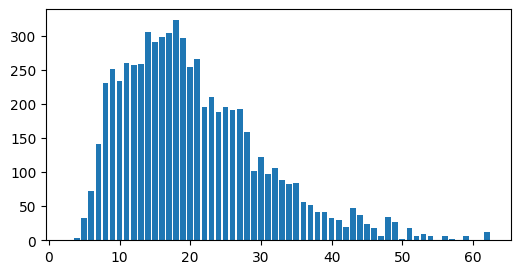

In [ ]:
from collections import Counter
from matplotlib import pyplot as plt

len_counts = Counter(lens)
plt.figure(figsize = (6,3))
plt.bar(len_counts.keys(), len_counts.values())

Выведем самый длинный текст.

In [ ]:
for i in range(len(train)):
    if len(train['sentence'][i].split()) == max_l:
        print(f"Предложение:\n{train['sentence'][i]}")
        print(f"Сущность:\n{train['entity'][i]}")
        print(f"Тональность:\n{train['label'][i]}\n")

Предложение:
Зрителям и организаторам соревнований было очевидно, что посеянная под первым номером пара китаянок Ван Сяоли и Юй Ян, две пары южнокорейских спортсменок (Чун Кюн Ын/Ким Ха На и Ха Чжон Ын/Ким Мин Чжон) и один индонезийский дуэт (Грейся Полии и Мейлиана Джаухари) намеренно пытались проиграть свои матчи, чтобы в кубковой части соревнований выйти на нужных противников и повысить свои шансы на медаль.
Сущность:
Грейся Полии
Тональность:
-1

Предложение:
Зрителям и организаторам соревнований было очевидно, что посеянная под первым номером пара китаянок Ван Сяоли и Юй Ян, две пары южнокорейских спортсменок (Чун Кюн Ын/Ким Ха На и Ха Чжон Ын/Ким Мин Чжон) и один индонезийский дуэт (Грейся Полии и Мейлиана Джаухари) намеренно пытались проиграть свои матчи, чтобы в кубковой части соревнований выйти на нужных противников и повысить свои шансы на медаль.
Сущность:
Ким Мин Чжон
Тональность:
-1

Предложение:
Зрителям и организаторам соревнований было очевидно, что посеянная под первым

Посмотрим на распределение классов тональности.

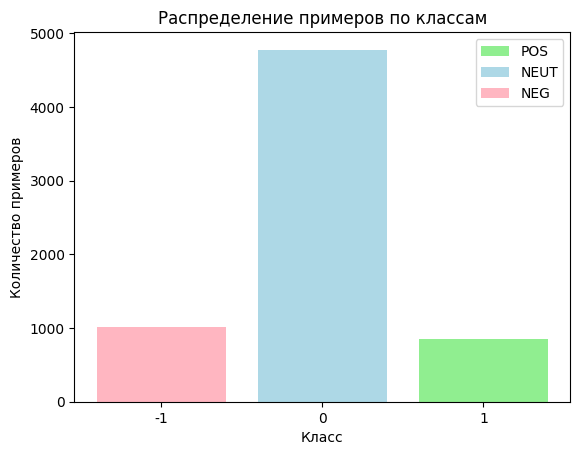

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Класс')
plt.ylabel('Количество примеров')
plt.title('Распределение примеров по классам')
plt.bar(1, train[train['label'] == 1].shape, label='POS', color='lightgreen')
plt.bar(0, train[train['label'] == 0].shape, label='NEUT', color='lightblue')
plt.bar(-1, train[train['label'] == -1].shape, label='NEG', color='lightpink')
plt.xticks(ticks=[1, 0, -1], labels=['1', '0', '-1'])
plt.legend()
plt.show()

Посмотрим статистику по типам сущностей.

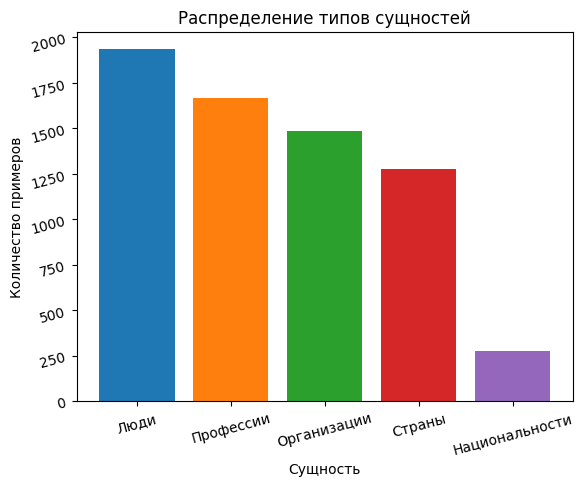

In [ ]:
plt.figure()
plt.xlabel('Сущность')
plt.ylabel('Количество примеров')
plt.title('Распределение типов сущностей')
plt.bar('Люди', train[train['entity_tag'] == 'PERSON'].shape)
plt.bar('Профессии', train[train['entity_tag'] == 'PROFESSION'].shape)
plt.bar('Организации', train[train['entity_tag'] == 'ORGANIZATION'].shape)
plt.bar('Страны', train[train['entity_tag'] == 'COUNTRY'].shape)
plt.bar('Национальности', train[train['entity_tag'] == 'NATIONALITY'].shape)
plt.xticks(ticks=['Люди', 'Профессии', 'Организации', 'Страны', 'Национальности'])
plt.tick_params(labelrotation=15)
plt.show()

Определим самые частые сущности.

In [ ]:
train['entity'].value_counts()

,count
entity,
США,124
России,79
президента,37
Google,25
Китая,25
...,...
Б.Обамы,1
Премьер-министр Греции,1
Андре Беттанкур,1


## Модель

В этом разделе осуществим тонкую настройку модели [RuBERT base conversational](https://huggingface.co/DeepPavlov/rubert-base-cased-conversational).

### Создание вопросов

Будем решать задачу классификации пары предложений. На вход подаются два предложения, разделенные токеном [SEP]:
1. Вопрос «Как относятся к X?» где Х – сущность в дательном падеже;
2. Текст предложения.

Следовательно, необходимо каждое предложение сопроводить вопросом. Для постановки сущности в дательный падеж воспользуемся библиотекой [pymorphy3](https://github.com/no-plagiarism/pymorphy3). Документация аналогична предыдущей версии библиотеки [pymorphy2](https://pymorphy2.readthedocs.io/en/stable/user/guide.html).

In [ ]:
!pip install -q pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.6 MB/s eta 0:00:00


In [ ]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

С помощью метода `morph.parse()` получаем все возможные морфологические разборы слова и берем первый вариант.

In [ ]:
word = morph.parse(train['entity'][0])
word

[Parse(word='спортсмена', tag=OpencorporaTag('NOUN,anim,masc sing,gent'), normal_form='спортсмен', score=0.833333, methods_stack=((DictionaryAnalyzer(), 'спортсмена', 52, 1),)),
 Parse(word='спортсмена', tag=OpencorporaTag('NOUN,anim,masc sing,accs'), normal_form='спортсмен', score=0.166666, methods_stack=((DictionaryAnalyzer(), 'спортсмена', 52, 3),))]

 С помощью метода `.inflect()` ставим слово в нужный падеж.

In [ ]:
dative = word[0].inflect({'datv'})
dative

Parse(word='спортсмену', tag=OpencorporaTag('NOUN,anim,masc sing,datv'), normal_form='спортсмен', score=1.0, methods_stack=((DictionaryAnalyzer(), 'спортсмену', 52, 2),))

 С помощью метода `.restore_capitalization()` сохраняем исходный регистр.  Применяем это к каждому слову, входящему в название сущности.

In [ ]:
def question(df):
  sentences = []
  for entity in df['entity'].values:
    try:
      dative_list = [pymorphy3.shapes.restore_capitalization(morph.parse(x)[0].inflect({'datv'}).word, x) for x in entity.split()]
      final_form = ' '.join(dative_list)
    except AttributeError:
      final_form = entity
    sentences.append(f'Как относятся к {final_form}?')
  return sentences

Добавим вопросы для объектов обучающей, валидационной и тестовой выборки.

In [ ]:
train['question'] = question(train)
train.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label,question
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,0,Как относятся к спортсмену?
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,0,Как относятся к музыкантам?
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,0,Как относятся к Егору Свиридову?
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,0,Как относятся к россиянину?
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,-1,Как относятся к американским захватчику?


In [ ]:
validation['question'] = question(validation)
validation.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label,question
0,Представители вооруженных сил Южной Кореи сооб...,вооруженных сил Южной Кореи,ORGANIZATION,14,41,0,Как относятся к вооружённым силам Южной Корее?
1,В 2012 году Мурси победил во втором туре прези...,президентских,PROFESSION,41,54,0,Как относятся к президентским?
2,В заключительной церемонии фестиваля примут уч...,журналисты,PROFESSION,129,139,0,Как относятся к журналистам?
3,"В своём последнем слове Лапшин заявил, что его...",Азербайджана,COUNTRY,66,78,0,Как относятся к Азербайджану?
4,Однако после совещания судейского корпуса было...,Спартака,ORGANIZATION,113,121,0,Как относятся к Спартаку?


In [ ]:
test['question'] = question(test)
test.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,question
0,Абдул Реза Шайхулислами выразил готовность Ира...,Абдул Реза Шайхулислами,PERSON,0,23,Как относятся к Абдулу Резе Шайхулислам?
1,Абдул Реза Шайхулислами выразил готовность Ира...,афганцев,NATIONALITY,157,165,Как относятся к афганцам?
2,Абдул Реза Шайхулислами выразил готовность Ира...,правительству Афганистана,ORGANIZATION,68,93,Как относятся к правительству Афганистану?
3,В своем выступлении Абдул Реза Шайхулислами от...,Абдул Реза Шайхулислами,PERSON,20,43,Как относятся к Абдулу Резе Шайхулислам?
4,"В свою очередь, Зорар Ахмад Мокбел заявил о то...",Ирана,COUNTRY,86,91,Как относятся к Ирану?


### Предобработка

Исходно метки датасета выглядят так: -1 - отрицательная тональность, 0 - нейтральная, 1 - положительная.

При обучении нейросети мы выбираем предсказанный класс как позицию наибольшего значения (наибольшей вероятности). Следовательно, необходимо избавиться от отрицательных значений в метках класса.

Применим преобразование к обучающей и валидационной выборке.

In [ ]:
label_dict = {-1: 0, 0: 1, 1: 2}
train['raw_label'] = train["label"]
train['label'] = train["raw_label"].map(label_dict)
train.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label,question,raw_label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,1,Как относятся к спортсмену?,0
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,1,Как относятся к музыкантам?,0
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,1,Как относятся к Егору Свиридову?,0
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,1,Как относятся к россиянину?,0
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,0,Как относятся к американским захватчику?,-1


In [ ]:
validation['raw_label'] = validation["label"]
validation['label'] = validation["raw_label"].map(label_dict)
validation.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label,question,raw_label
0,Представители вооруженных сил Южной Кореи сооб...,вооруженных сил Южной Кореи,ORGANIZATION,14,41,1,Как относятся к вооружённым силам Южной Корее?,0
1,В 2012 году Мурси победил во втором туре прези...,президентских,PROFESSION,41,54,1,Как относятся к президентским?,0
2,В заключительной церемонии фестиваля примут уч...,журналисты,PROFESSION,129,139,1,Как относятся к журналистам?,0
3,"В своём последнем слове Лапшин заявил, что его...",Азербайджана,COUNTRY,66,78,1,Как относятся к Азербайджану?,0
4,Однако после совещания судейского корпуса было...,Спартака,ORGANIZATION,113,121,1,Как относятся к Спартаку?,0


Преобразуем набор данных в датасет Hugging Face.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -q datasets transformers evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5

In [ ]:
from datasets import Dataset, DatasetDict
dataset_dict = DatasetDict({"train": Dataset.from_pandas(train),
                            "validation": Dataset.from_pandas(validation),
                            "test": Dataset.from_pandas(test)})

Мы получили объект класса `DatasetDict`, который включает обучающую выборку, валидационную выборку и тестовую выборку.

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label'],
        num_rows: 6637
    })
    validation: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label'],
        num_rows: 2845
    })
    test: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'question'],
        num_rows: 1947
    })
})

In [ ]:
dataset_dict["train"][0]

{'sentence': 'Джеймс «Бадди» Макгирт (James (Buddy) McGirt, тренер Дадашева упрашивал дагестанского спортсмена остановить бой, но тот хотел продолжать.',
 'entity': 'спортсмена',
 'entity_tag': 'PROFESSION',
 'entity_pos_start_rel': 86,
 'entity_pos_end_rel': 96,
 'label': 1,
 'question': 'Как относятся к спортсмену?',
 'raw_label': 0}

Чтобы предобработать датасет, нам необходимо конвертировать текст в числа, которые может обработать модель. Это делается с помощью токенизатора.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "DeepPavlov/rubert-base-cased-conversational"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Чтобы хранить данные в формате датасета, мы будем использовать методы `Dataset.map()`. Метод `map()` применяет некоторую функцию к каждому элементу датасета.

Давайте определим функцию, которая токенизирует наши входные данные:

In [ ]:
def tokenize_function(example):
    return tokenizer(example["question"], example["sentence"])

In [ ]:
tokenized_dataset = dataset_dict.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/6637 [00:00<?, ? examples/s]

Map:   0%|          | 0/2845 [00:00<?, ? examples/s]

Map:   0%|          | 0/1947 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6637
    })
    validation: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2845
    })
    test: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'question', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1947
    })
})

`input_ids` содержит индексы, соответствующие токенам по словарю.

Маски внимания (`attention_mask`) — это тензоры той же формы, что и тензор входных идентификаторов, заполненные 0 и 1: 1 означает, что соответствующие токены должны “привлекать внимание”, а 0 означает, что соответствующие токены не должны “привлекать внимание” (т.е. должны игнорироваться слоями внимания модели).

`token_type_ids` указывает модели, какая часть входных данных является первым предложением, а какая вторым.

In [ ]:
print(f'input_ids\n{tokenized_dataset["train"][0]["input_ids"]}')
print(f'attention_mask\n{tokenized_dataset["train"][0]["attention_mask"]}')
print(f'token_type_ids\n{tokenized_dataset["train"][0]["token_type_ids"]}')

input_ids
[101, 1235, 12156, 344, 14386, 353, 166, 102, 18688, 304, 91380, 326, 3849, 897, 1384, 120, 11412, 120, 12428, 9951, 281, 122, 27577, 183, 46563, 128, 10109, 82922, 37085, 3969, 80445, 59906, 1370, 29186, 10817, 5741, 128, 876, 1878, 3054, 9503, 132, 102]
attention_mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
token_type_ids
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Функция, отвечающая за объединение элементов внутри батча, называется `collate_function`. Это аргумент, который вы можете передать при создании `DataLoader`. По умолчанию это функция, которая просто преобразует объекты в тензоры PyTorch и объединяет их. В нашем случае это невозможно, поскольку входные данные, которые у нас есть, не будут иметь одинакового размера.

Функция `collate_function` будет осуществлять корректный паддинг элементов выборки, которые мы хотим объединить в батч. Библиотека Transformers предоставляет эту функцию через класс `DataCollatorWithPadding`. При создании экземпляра требуется указать токенизатор: чтобы знать, какой токен использовать для паддинга и слева или справа нужно дополнять данные.

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Мы хотим использовать GPU в случае, если у нас будет такая возможность (на CPU процесс может занять несколько часов вместо пары минут). Чтобы добиться этого, мы определим переменную `device` и «прикрепим» к видеокарте нашу модель и данные.

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Перейдем к тонкой настройке.

### Trainer

Библиотека Transformers предоставляет класс `Trainer`, который помогает произвести тонкую настройку любой предобученной модели на вашем датасете. После предобработки данных, сделанных в прошлом разделе, вам останется сделать несколько шагов для определения `Trainer`.

Первый шаг перед определением `Trainer` — задание класса `TrainingArguments`, который будет содержать все гиперпараметры для `Trainer` (для процессов обучения и валидации). Единственный аргумент, который обязательно нужно задать, — это каталог, в котором будет сохранена обученная модель. Для всего остального можно оставить значения по умолчанию.

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir='./results',
                                  evaluation_strategy="epoch",
                                  report_to="none")

Второй шаг – задание модели. Мы будем использовать класс `AutoModelForSequenceClassification` с тремя классами:

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3).to(device)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased-conversational and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


После того как мы загрузили модель, мы можем определить `Trainer` и передать туда нужные объекты: `model`, `training_args`, обучающую и валидационную выборки, `data_collator` и `tokenizer`.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    processing_class=tokenizer
)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
trainer.model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Для тонкой настройки модели на нашем датасете нужно вызвать метод `train()` у `Trainer`:

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.743200,0.622702
2,0.472800,0.569077
3,0.334700,0.884487


TrainOutput(global_step=2490, training_loss=0.48802639145448984, metrics={'train_runtime': 518.1437, 'train_samples_per_second': 38.428, 'train_steps_per_second': 4.806, 'total_flos': 687886905447126.0, 'train_loss': 0.48802639145448984, 'epoch': 3.0})

Чтобы получить предсказания, мы можем использовать встроенную функцию `Trainer.predict()`. В качестве выходов модели получаем различные данные, нам нужны именно предсказания и истинные метки. Чтобы определить предсказанный класс, будем брать позицию максимального значения (`argmax`) по строке (`axis=-1`). Также осуществим обратное преобразование меток. Объединим все этапы в функцию `predict_labels`.

In [ ]:
import numpy as np

def predict_labels(dataset):
    output = trainer.predict(dataset)
    logits, labels = output[:2]
    predictions = np.argmax(logits, axis=-1)
    reverse_label_dict = {v:k for k, v in label_dict.items()}
    return [reverse_label_dict[x] for x in predictions]

Запишем предсказания на валидационной выборке и добавим их в датасет.

In [ ]:
validation_predictions = predict_labels(tokenized_dataset["validation"])
print(len(validation_predictions))
validation_predictions[:25]

2845


[0, 0, 0, -1, 0, -1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, -1]

In [ ]:
tokenized_dataset["validation"] = tokenized_dataset["validation"].add_column("predictions", validation_predictions)
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6637
    })
    validation: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label', 'input_ids', 'token_type_ids', 'attention_mask', 'predictions'],
        num_rows: 2845
    })
    test: Dataset({
        features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'question', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1947
    })
})

Посчитаем значение макро F1-меры.

In [ ]:
import evaluate

def compute_metrics(preds, labels):
    metric = evaluate.load("f1")
    return metric.compute(predictions=preds, references=labels, average="macro")

In [ ]:
compute_metrics(tokenized_dataset["validation"]["predictions"], tokenized_dataset["validation"]["raw_label"])

{'f1': 0.6627991914412169}

Однако в соревновании рейтинг строится по макро F1-мере, посчитанной только для положительного и отрицательного класса. Уберем нейтральный класс и посчитаем метрику.

In [ ]:
filtered_validation = tokenized_dataset["validation"].filter(lambda example: example["raw_label"]!=0)
filtered_validation

Filter:   0%|          | 0/2845 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence', 'entity', 'entity_tag', 'entity_pos_start_rel', 'entity_pos_end_rel', 'label', 'question', 'raw_label', 'input_ids', 'token_type_ids', 'attention_mask', 'predictions'],
    num_rows: 800
})

In [ ]:
compute_metrics(filtered_validation["predictions"], filtered_validation["raw_label"])

{'f1': 0.4429425396877294}

Осуществим предсказания на тестовой выборке и запишем их в файл.

In [ ]:
test_predictions = predict_labels(tokenized_dataset["test"])
print(len(test_predictions))
test_predictions[1925:]

1947


[0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
pd.Series(test_predictions).to_csv('RuSentNE_predictions_Trainer.zip', compression={'method': 'zip', 'archive_name': 'RuSentNE_predictions_Trainer.csv'}, index=False, header=False)

Итоговый zip-архив, содержащий внутри себя csv-файл, может быть отправлен на платформу CodaLab для получения метрики на тестовой выборке.